In [4]:
# Imports
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [5]:
# fetching the raw mnist dataset for digits
# https://stackoverflow.com/questions/47324921/cant-load-mnist-original-dataset-using-sklearn

dataset = fetch_openml('mnist_784')

In [6]:
# Split data into Features, Labels

# first column correspond to the number, other columns contains pixel values(0 to 255)

X,Y = dataset['data'], dataset['target']

In [7]:
# taking 10000 samples to perform (time mangement)

x = X[:10001]
y = Y[:10001]

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

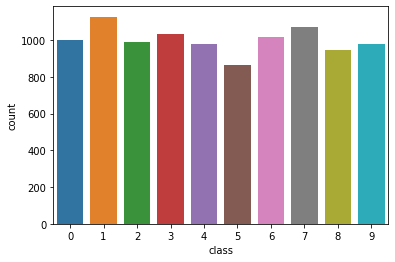

In [8]:
sns.countplot(y)

In [9]:
# Train-Test split

# Following an 80-20 split on data.
# The dataset is shuffled with a the random seed for reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)


In [10]:
# Feature normalization

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Fit model to training data

# Linear (acc = 0.92)
#classifier = SVC(kernel='linear')

# Polynomial (acc = 0.96)
#classifier = SVC(kernel='poly')  

# RBF (acc = 0.97)

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [20]:
# Evaluate on test data
 
y_pred = classifier.predict(X_test)

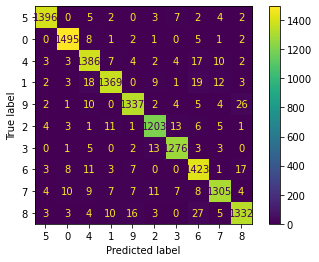

In [21]:
# Confusion Matrix

class_labels = dataset['target'].unique()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [22]:
# Performance Statistics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1421
           1       0.98      0.99      0.98      1515
           2       0.95      0.96      0.96      1438
           3       0.97      0.95      0.96      1436
           4       0.97      0.96      0.97      1391
           5       0.96      0.96      0.96      1248
           6       0.97      0.98      0.98      1303
           7       0.94      0.97      0.95      1473
           8       0.97      0.95      0.96      1372
           9       0.96      0.95      0.95      1403

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

